当前随机数可以被判定为类型： [[1.]]
距离当前点最近的5个邻居是： [[1. 1. 1. 1. 1.]]
5个最近邻居的距离： [[212. 277. 509. 530. 530.]]


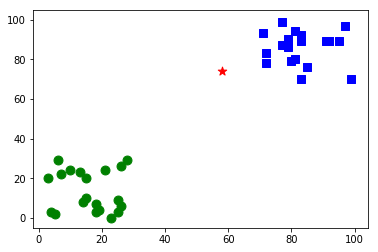

In [2]:
%matplotlib inline
#20.4 演示OpenCV自带的K近邻算法模块使用方法
#使用OpenCV自带的K近邻模块判断生成的随即数对test是属于rand1所在类型0，还是属于rand2所在类型1
import cv2
import numpy as np
import matplotlib.pyplot as plt
#创建两组用于训练得数据，每组包含20对随机数（20个随机数据点）
rand1=np.random.randint(0,30,(20,2)).astype(np.float32)
rand2=np.random.randint(70,100,(20,2)).astype(np.float32)
#将rand1和rand2拼接为训练数据
trainData=np.vstack((rand1,rand2))
#接下来为两组随机数分配标签,共两类：0和1
r1Label=np.zeros((20,1)).astype(np.float32)
r2Label=np.ones((20,1)).astype(np.float32)
tdLabel=np.vstack((r1Label,r2Label))
#使用绿色标注类型0
g=trainData[tdLabel.ravel()==0]
plt.scatter(g[:,0],g[:,1],80,"g","o")
#使用蓝色标注类型1
b=trainData[tdLabel.ravel()==1]
plt.scatter(b[:,0],b[:,1],80,"b","s")
#然后，生成一对值在(0,100)内的随机数对test,为用于测试的随机数
test=np.random.randint(0,100,(1,2)).astype(np.float32)
plt.scatter(test[:,0],test[:,1],80,"r","*")
#调用OpenCV内的 K 近邻模块，并进行训练
knn=cv2.ml.KNearest_create()
knn.train(trainData,cv2.ml.ROW_SAMPLE,tdLabel)
#使用 K 邻近算法分类
ret,result,neighbours,dist=knn.findNearest(test,5)
#显示处理结果
print("当前随机数可以被判定为类型：",result)
print("距离当前点最近的5个邻居是：",neighbours)
print("5个最近邻居的距离：",dist)
plt.show()